In [4]:
import fewshot_dataset
#root_dir="/home/judah/control_augmented_images_sun397_512"
root_dir ="/home/augmented_data/control_augmented_images_caltech256_512"

ds = fewshot_dataset.FewShotDataset( root_dir, num_unique_files=0, include_variations=True)

import sys
from PIL import Image

def combine(images):
    widths, heights = zip(*(i.size for i in images))
    
    total_width = sum(widths)
    max_height = max(heights)
    
    new_im = Image.new('RGB', (total_width, max_height))
    
    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]
    return new_im

    
def get_combo(x):
    x=x*3
    return combine([ds[x][0].resize((512,512)),ds[x+1][0].resize((512,512)),ds[x+2][0].resize((512,512))])

In [ ]:
for x in range(500,600):
    display(get_combo(x))

In [ ]:
# remove in the end images that wereaugmented but classified wrong

# only remove them if the original is classified correctly



C classes
N shots
A augmentations


We can train baseline for like 50x longer



In [ ]:
import random
idxs =  random.sample(range(0, len(ds)//3), 100)

In [ ]:
for x in idxs:
    display(get_combo(x))

In [ ]:
display(get_combo(0))

In [5]:
import fewshot_dataset
import torch
root_dir="/home/pat/diffusion_augmentation/control_augmented_images_sun397_512"
root_dir ="/home/augmented_data/control_augmented_images_caltech256_512"
ds = fewshot_dataset.FewShotDataset( root_dir, num_unique_files=0, include_variations=False)
from torchvision.datasets import Caltech256
og_dataset = Caltech256(root = "./torch" ,download=True,transform=None)
generator = torch.Generator().manual_seed(42)
train_size = int(0.8 * len(og_dataset))
test_size = len(og_dataset) - train_size
og_dataset, test_dataset = torch.utils.data.random_split(og_dataset, [train_size, test_size],generator=generator)
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

transform = transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda x: f(x))])
def f(x):
                if x.shape[0] == 1:
                    return x.repeat(3,1,1)
                return x
#pat_ds = torchvision.datasets.ImageFolder(root="/home/judah/auto_aux/torch/caltech256/caltech256"+"/256_ObjectCategories/",transform=transform)
pat_ds = torchvision.datasets.ImageFolder(root="/home/pat/diffusion_augmentation/torch/caltech256"+"/256_ObjectCategories/",transform=transform)


Files already downloaded and verified


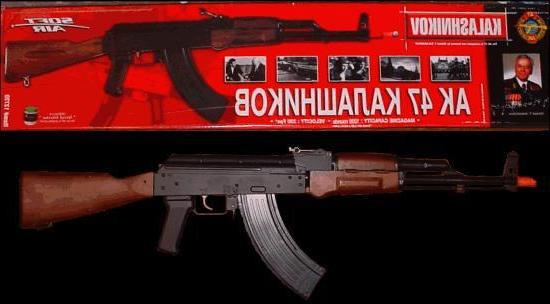

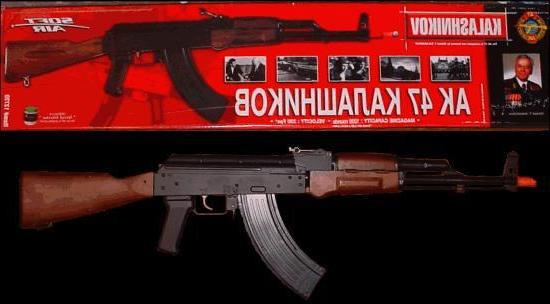

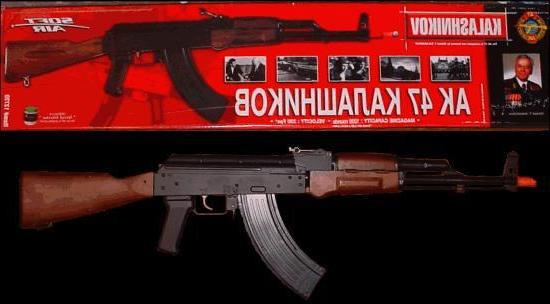

In [2]:


display(og_dataset[160][0])


display(ds[19][0])

display(F.to_pil_image(pat_ds[46][0]))



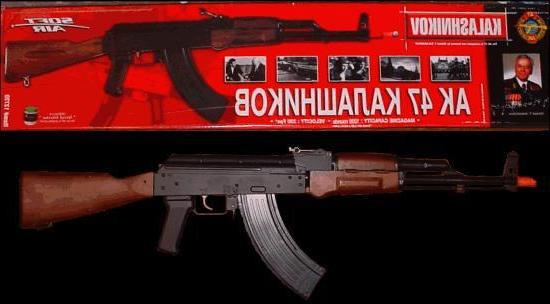

In [6]:
path="/home/augmented_data/control_augmented_images_caltech256_512/0000000000/"
import os
files = os.listdir(path)
# for file in files:
#     if "original" in str(file):
#         display(Image.open(path + file).convert("RGB"))

display(Image.open(path + files[-2]).convert("RGB"))


In [39]:
import numpy as np

a=np.array(ds[19][0]) # augmented directory one
e = np.array(Image.open(path + files[-2]).convert("RGB")) # directly loading in the image from augmented dir

b=np.array(og_dataset[160][0]) # Torchvision one
c = np.array( F.to_pil_image(pat_ds[46][0])) # image folder one
d = np.array(test_img)   # replocating the pipeline
f_ = np.array(test_img2) # replocating pipeline with your collate and  dataloader 

# just image saved


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
np.array_equal(b, f_)

In [10]:
from torchvision.transforms import InterpolationMode
from torchvision.transforms.functional import to_pil_image
import cv2
def my_collate_fn(batch):
    transform = transforms.Compose([
        transforms.Resize(size=(512, 512), interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
    ])
    
    original_images = []
    transformed_images = []
    labels = []

    for img, label in batch:
        original_images.append(img)  # Store original PIL image
        transformed_images.append(transform(to_pil_image(img)))  # Apply transformation
        labels.append(label)

    return torch.stack(transformed_images), labels, original_images
    
from torch.utils.data import DataLoader

data_loader = DataLoader(pat_ds, batch_size=10, shuffle=False, collate_fn=my_collate_fn)

i=0
for batch in data_loader:
    if i>=60:
        break
    images, labels, original_images = batch
    for img, label, og_img in zip(images, labels, original_images):
        i+=1
        if i !=47:
            continue
        og_img = og_img.numpy()
        og_img = np.transpose(og_img, (1, 2, 0))
        og_img = (og_img * 255).astype(np.uint8)
        cv2.imwrite("test_c2.png", cv2.cvtColor(og_img, cv2.COLOR_RGB2BGR))
        break
test_img2 = Image.open("test_c2.png").convert("RGB")

In [28]:
a = Image.open("test_c2.png").convert("RGB")
b = Image.open("test_c.png").convert("RGB")
np.array_equal(np.array(a), np.array(b))

FileNotFoundError: [Errno 2] No such file or directory: 'test_c.png'

In [8]:
import cv2
og_img = pat_ds[46][0]
og_img = og_img.numpy()
og_img = np.transpose(og_img, (1, 2, 0))
og_img = (og_img * 255).astype(np.uint8)
cv2.imwrite("test.png", cv2.cvtColor(og_img, cv2.COLOR_RGB2BGR))
from PIL import Image
test_img = Image.open("test.png").convert("RGB")



In [42]:
import numpy as np
import torchvision.transforms.functional as F
a=np.array(ds[19][0]) # augmented directory one
e = np.array(Image.open(path + files[-2]).convert("RGB")) # directly loading in the image from augmented dir

b = np.array(og_dataset[160][0]) # Torchvision one
# c = np.array(F.to_pil_image(pat_ds[46][0])) # image folder one
d = np.array(test_img)   # replocating the pipeline
f = np.array(test_img2) # replocating pipeline with your collate and  dataloader 

z = np.array(Image.open("/home/pat/diffusion_augmentation/control_augmented_images_caltech256_testog/0000000000/file160_original.png").convert("RGB"))
# np.array_equal(a, z)

# check if all of these are equal to each other
print(np.array_equal(a, b))
print(np.array_equal(a, c))
print(np.array_equal(a, d))
print(np.array_equal(a, e))
print(np.array_equal(a, f))
print(np.array_equal(a, z))

print(np.array_equal(b, c))

False
True
True
True
True
True
False


In [29]:
import fewshot_dataset
import torch
import sys
from PIL import Image
import fewshot_dataset
from torchvision.datasets import Caltech256
import numpy as np

root_dir ='/home/augmented_data/control_augmented_images_caltech256_512'
ds = fewshot_dataset.FewShotDataset( root_dir, num_unique_files=0, include_variations=False)
og_dataset = Caltech256(root = './torch' ,download=True,transform=None)

new_image = Image.open('/home/augmented_data/file160_original.png')


np.array_equal(np.array(new_image), np.array(ds[19][0])), np.array_equal(np.array(new_image), np.array(og_dataset[160][0]))


Files already downloaded and verified


(True, False)